In [ ]:
pip install kaggle

In [ ]:
#!/bin/bash
!kaggle datasets download yasserh/wine-quality-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
License(s): CC0-1.0
  0% 0.00/21.5k [00:00<?, ?B/s]
100% 21.5k/21.5k [00:00<00:00, 25.2MB/s]


In [ ]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

In [ ]:
def prepare_data(path: str) -> pd.DataFrame:
    with zipfile.ZipFile(path, 'r') as zip_ref:
        zip_ref.extractall()

    folder_path = path.split("/")[-1].split(".")[0]
    df = pd.read_csv(f'WineQT.csv')
    return df


In [ ]:
data = prepare_data("/content/wine-quality-dataset.zip")

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
data.drop(columns=["Id"], inplace=True)
input_columns = data.columns[:-1]

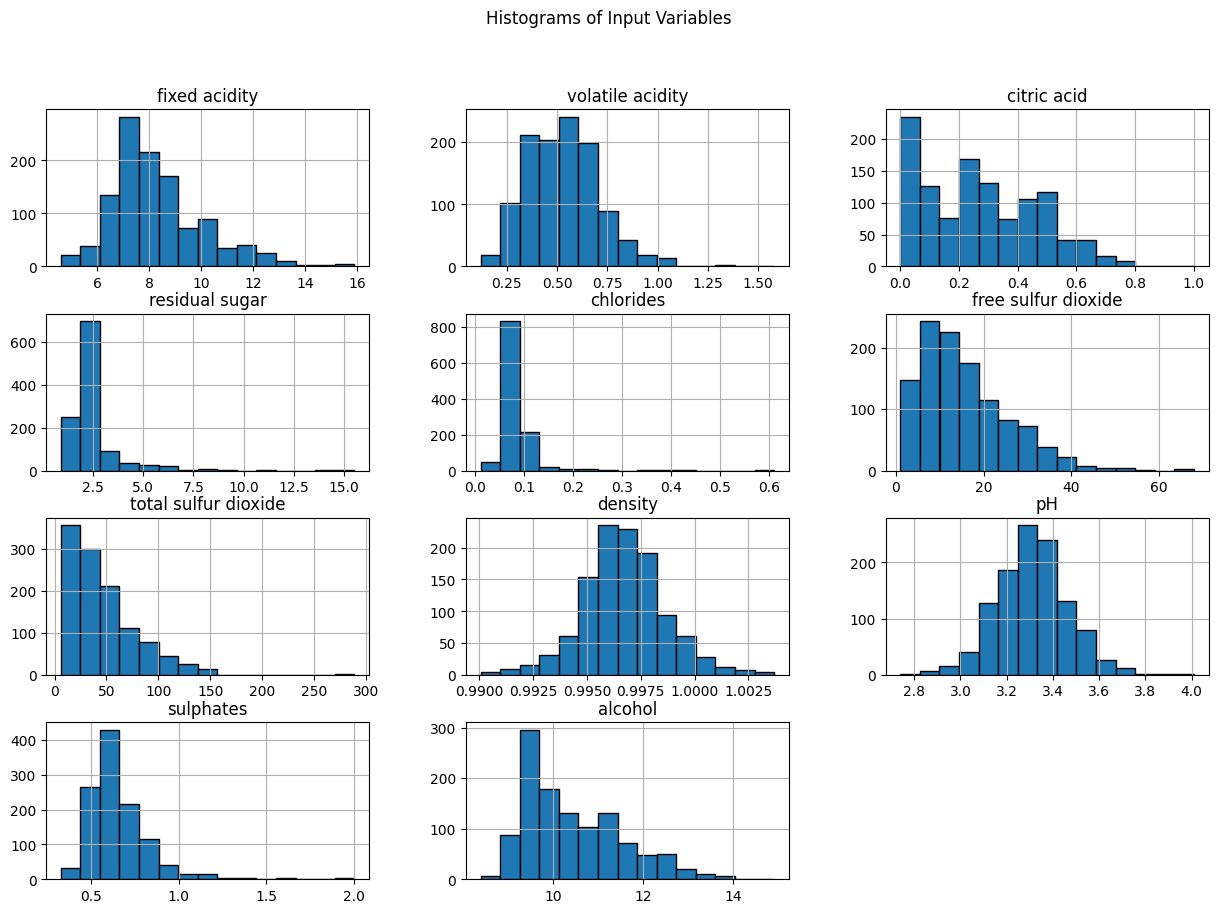

In [ ]:
data[input_columns].hist(bins=15, figsize=(15, 10), layout=(4, 3), edgecolor='black')
plt.suptitle('Histograms of Input Variables')
plt.show()

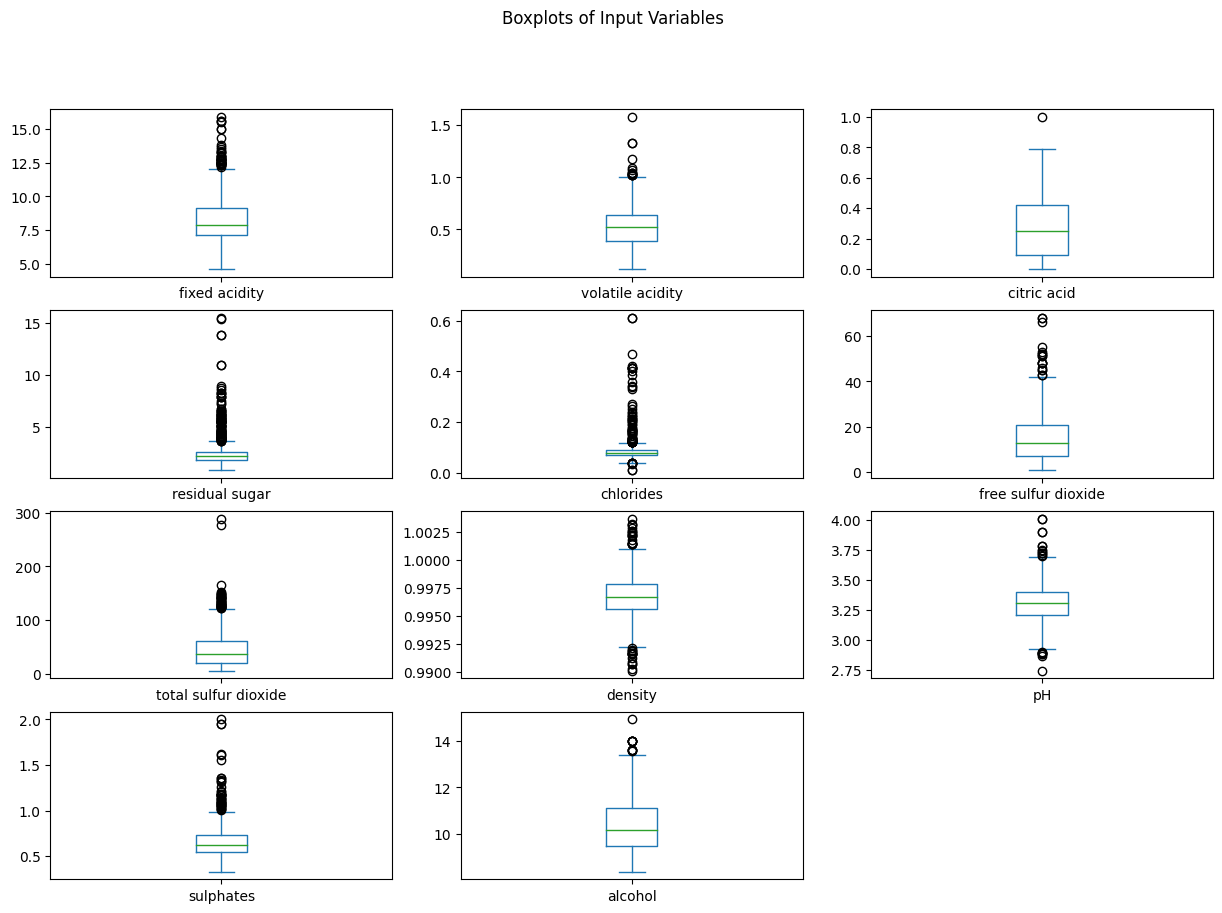

In [ ]:
data[input_columns].plot(kind='box', subplots=True, layout=(4, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.suptitle('Boxplots of Input Variables')
plt.show()

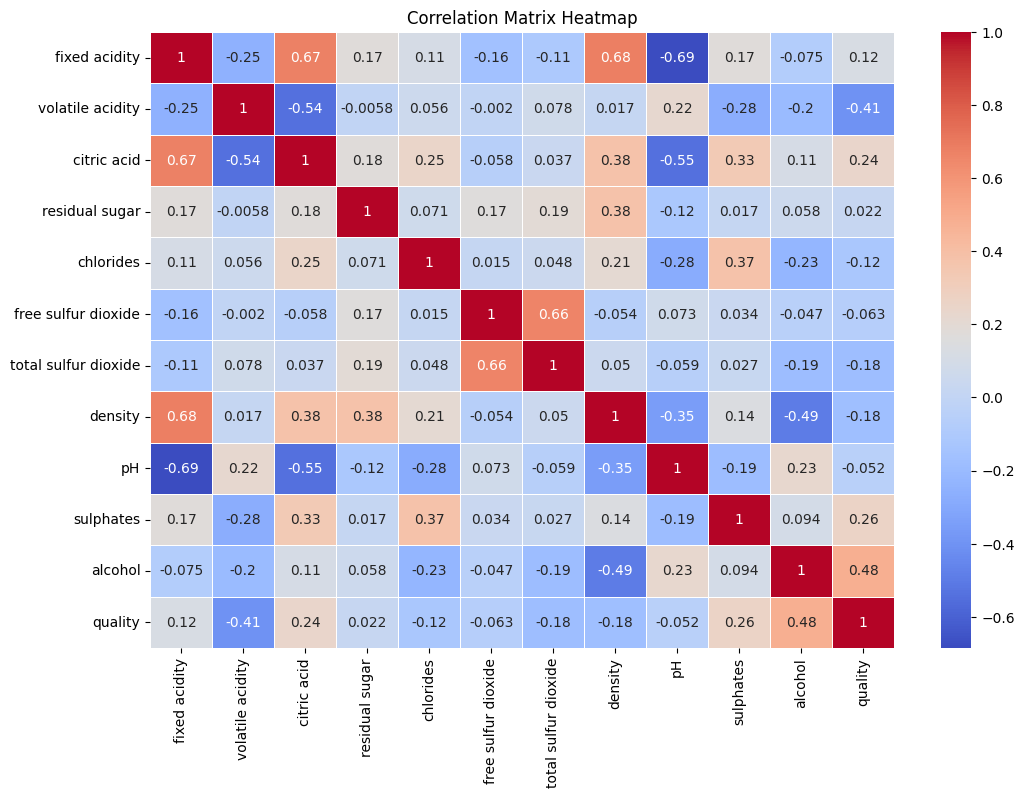

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
dropped_columns = ['pH', 'density', 'citric acid', 'total sulfur dioxide']

data_after_dropping = data.drop(columns=dropped_columns)
input_columns = data_after_dropping.columns[:-1]

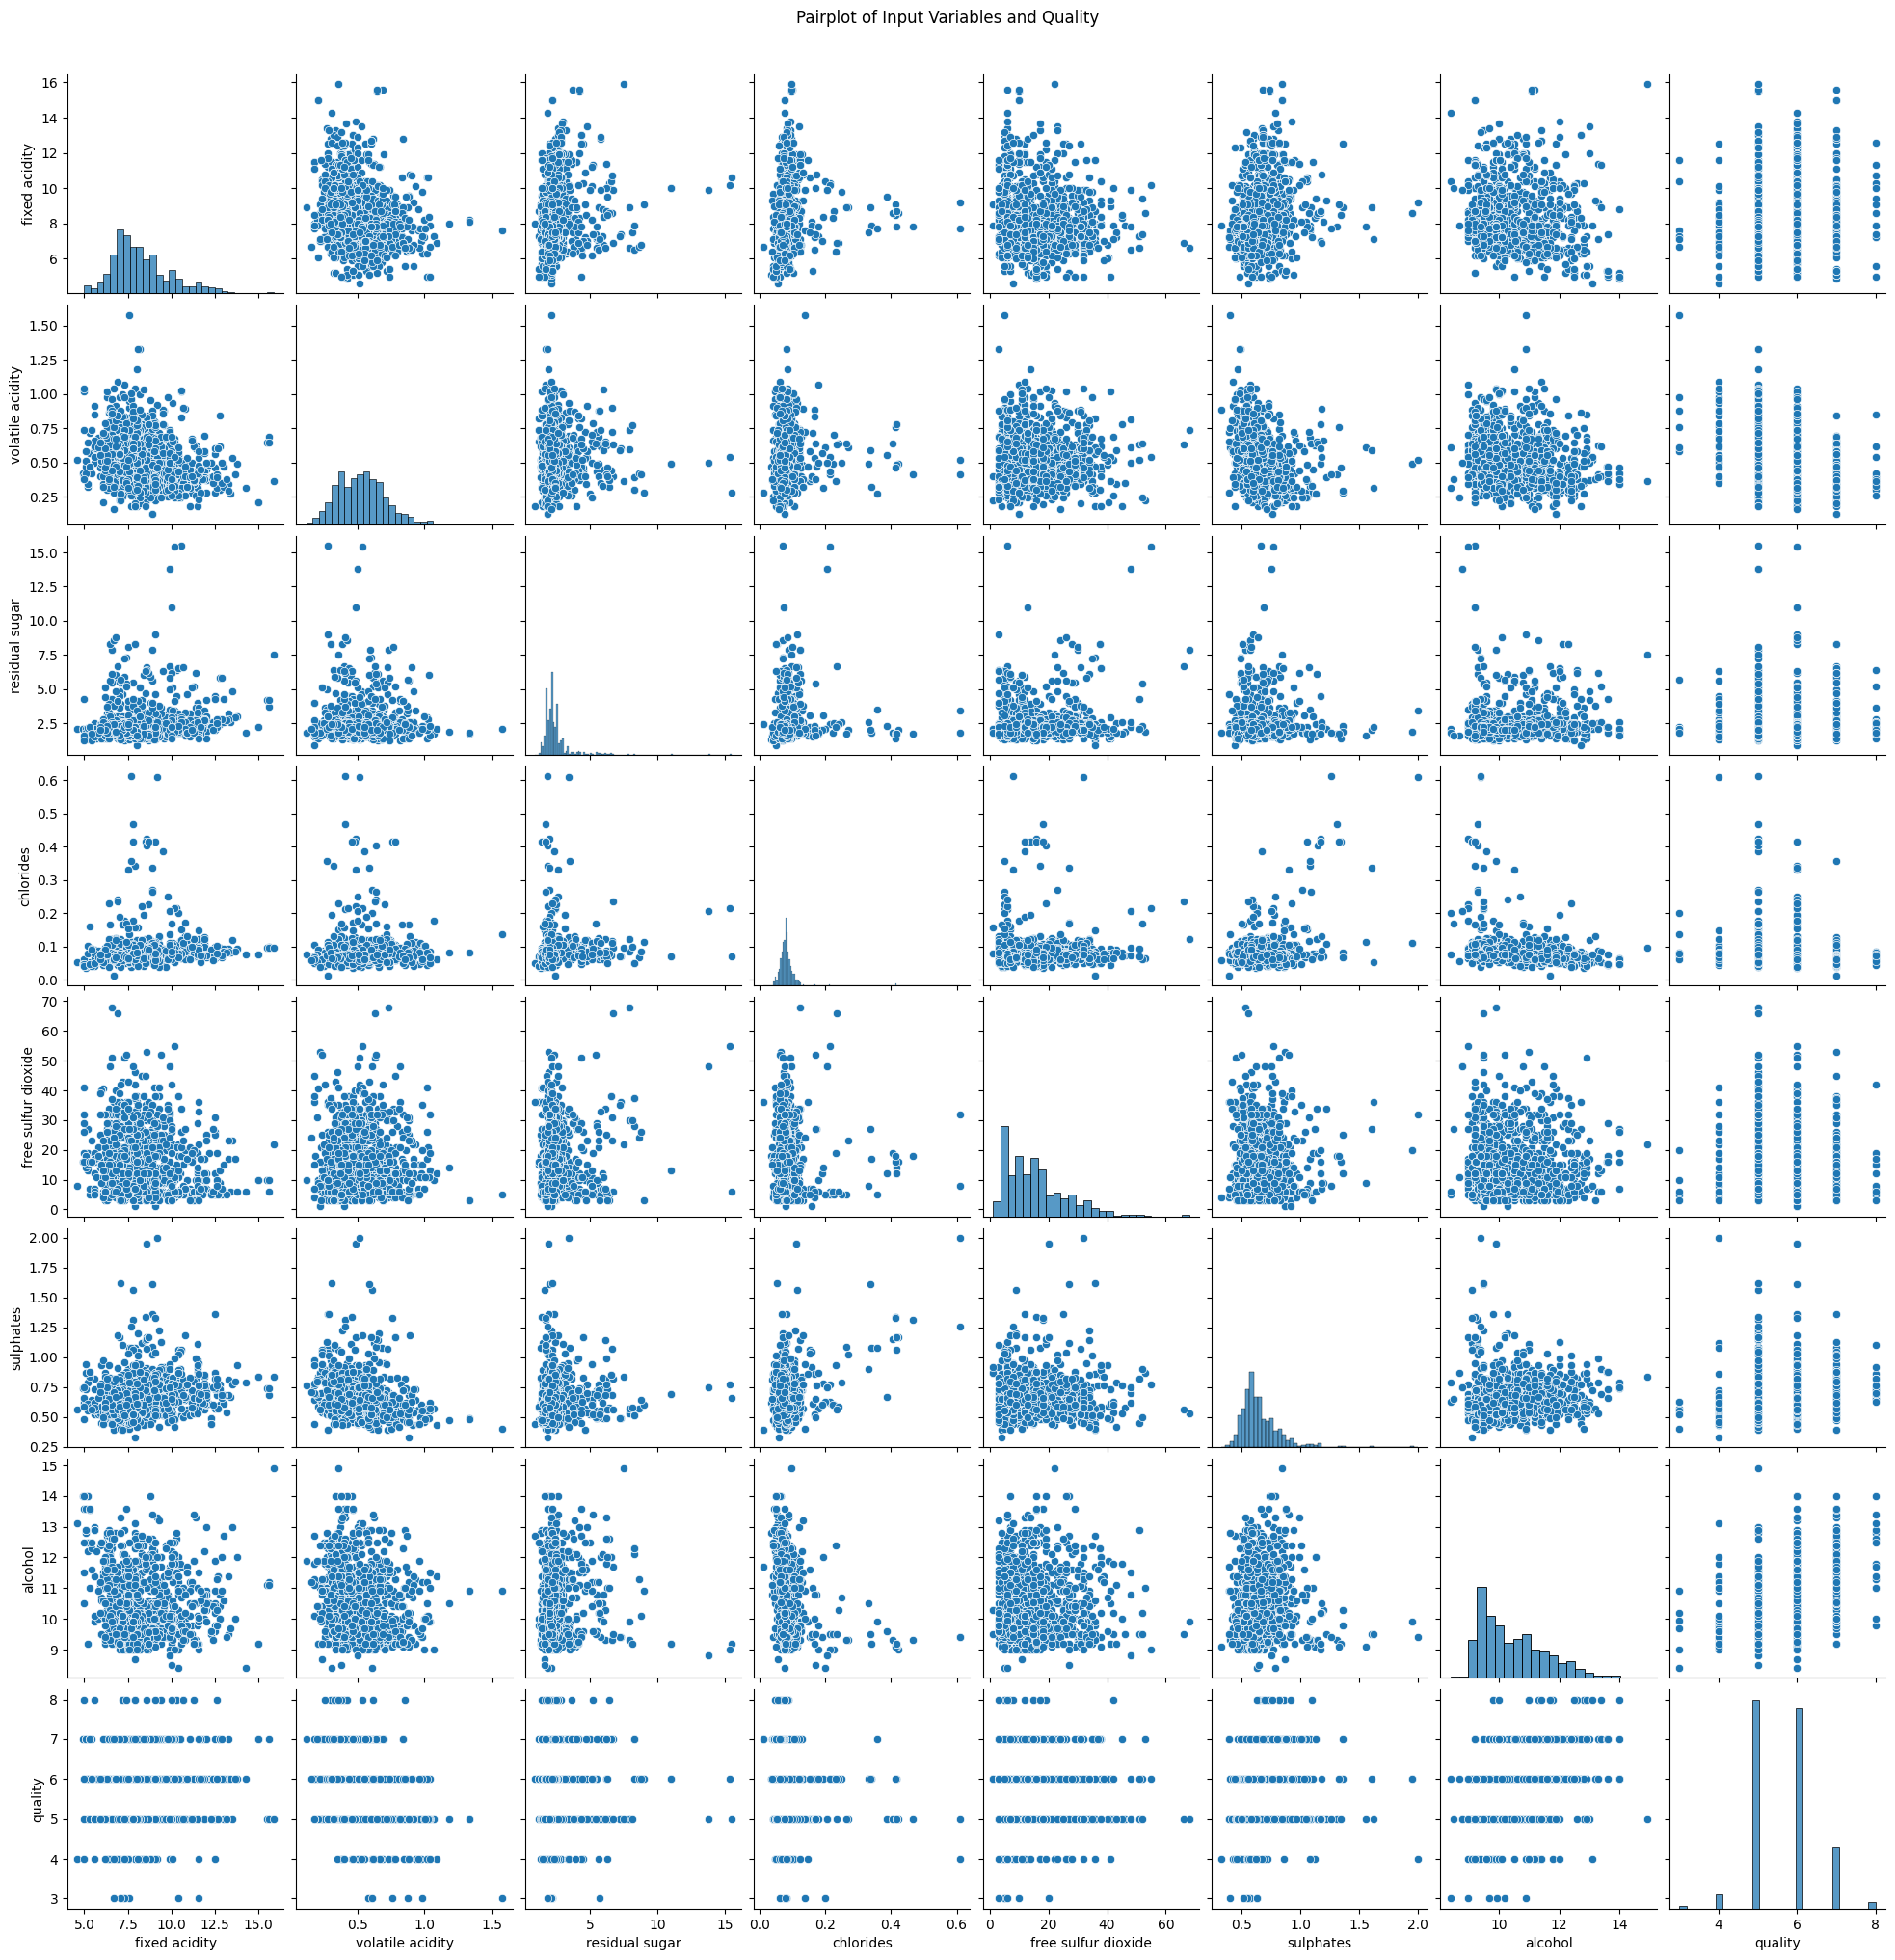

In [ ]:
sns.pairplot(data_after_dropping)
plt.suptitle('Pairplot of Input Variables and Quality', y=1.02)
plt.show()

In [ ]:
def save_data(df: pd.DataFrame, file_path: str) -> None:
    df.to_csv(file_path, index=False)
    print(f"Data saved to {file_path}, shape: {df.shape}")
file_path = "manual_data_dropping.csv"
save_data(data_after_dropping, file_path)

Data saved to manual_data_dropping.csv, shape: (1143, 8)


# dimensionality reduction using PCA

In [ ]:
data_without_quality = data.drop(columns=["quality"])

In [ ]:
data_without_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [ ]:
from sklearn.cluster import KMeans
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_without_quality)
    sse.append(kmeans.inertia_)


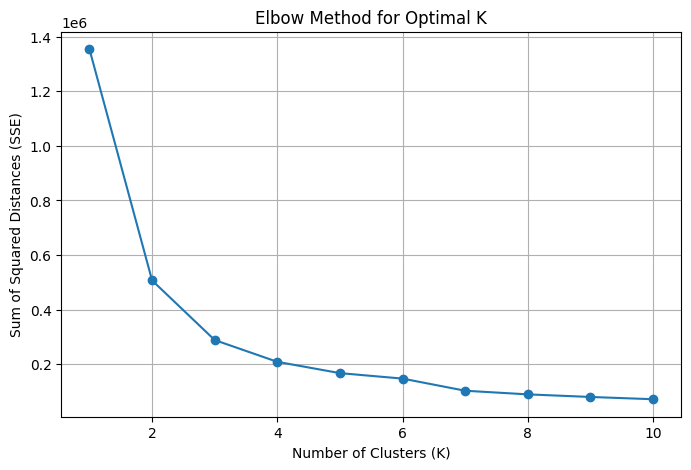

In [ ]:

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

optimal_k = 5

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_without_quality)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [ ]:
import numpy as np

class KMeansCluster:
    def __init__(self, n_clusters, max_iter=100, random_state=None, tolerance=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.tolerance = tolerance
        self.centroids = None
        self.labels = None

    def initialize_centroids(self, data):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        random_indices = np.random.choice(len(data), self.n_clusters, replace=False)
        self.centroids = data[random_indices]
        return self.centroids

    def assign_labels(self, data):
        distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
        self.labels = np.argmin(distances, axis=1)
        return self.labels

    def update_centroids(self, data):
        for i in range(self.n_clusters):
            cluster_points = data[self.labels == i]
            if len(cluster_points) > 0:
                self.centroids[i] = np.mean(cluster_points, axis=0)
            else:
                self.centroids[i] = data[np.random.choice(len(data))]
        return self.centroids

    def fit(self, data):
        self.initialize_centroids(data)
        for _ in range(self.max_iter):
            old_centroids = self.centroids.copy()
            self.assign_labels(data)
            self.update_centroids(data)
            if np.all(np.linalg.norm(old_centroids - self.centroids, axis=1) < self.tolerance):
                break
        return self.centroids, self.labels

    def predict(self, data):
        if self.centroids is None:
            raise Exception("You must fit the model before predicting.")
        self.assign_labels(data)
        return self.labels


In [ ]:
kmeans = KMeansCluster(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans.labels

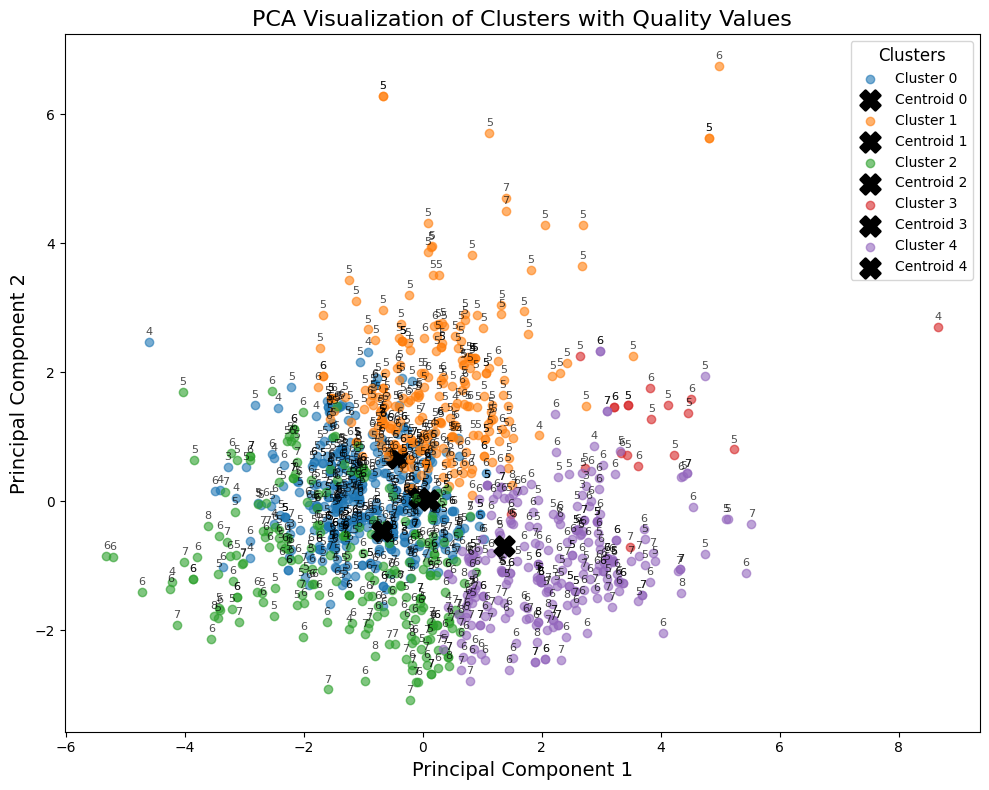

In [ ]:

plt.figure(figsize=(10, 8))

for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.6)


    centroid = kmeans.centroids[cluster]
    plt.scatter(centroid[0], centroid[1], marker='X', color='black', s=200, linewidths=2, label=f'Centroid {cluster}')

    for i in cluster_data.index:
        plt.annotate(data['quality'][i],
                     (cluster_data['PC1'][i], cluster_data['PC2'][i]),
                     textcoords="offset points",
                     xytext=(0, 5),
                     ha='center',
                     fontsize=8,
                     alpha=0.7)

plt.title('PCA Visualization of Clusters with Quality Values', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Clusters', fontsize=10, title_fontsize='12')
plt.tight_layout()
plt.show()


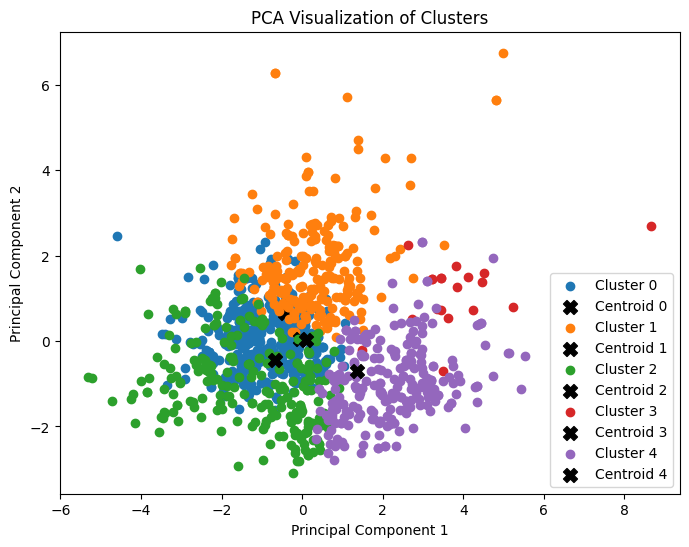

In [ ]:
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
    centroid = kmeans.centroids[cluster]
    plt.scatter(centroid[0], centroid[1], marker='X', color='black', s=100, label=f'Centroid {cluster}')


plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
save_data(df_pca, "pca_data.csv")

Data saved to pca_data.csv, shape: (1143, 3)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = df_pca.drop('Cluster', axis=1)
y = data_after_dropping['quality']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# print(classification_report(y_test, y_pred))

Accuracy: 0.62882096069869


In [ ]:
X = data_after_dropping.drop('quality', axis=1)
y = data_after_dropping['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5764192139737991
